In [2]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

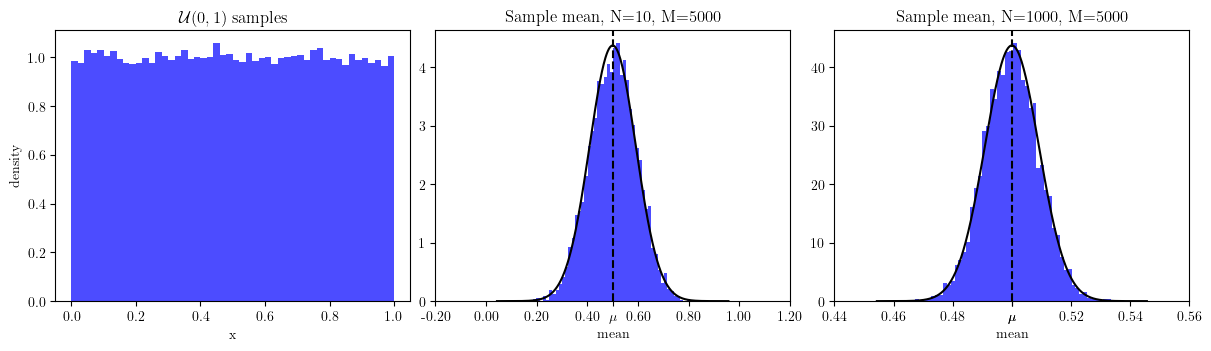

In [36]:
rng = np.random.default_rng(0)

M = 5000  # number of repeated experiments for the sample mean
Ns = [10, 1000]  # sample sizes
mu, var = 0.5, 1/12  # mean and variance of Uniform(0,1)

def sample_means(N, M):
    return rng.random((M, N)).mean(axis=1)

def normal_pdf(x, m, s):
    return np.exp(-0.5*((x-m)/s)**2) / (s*np.sqrt(2*np.pi))

raw = rng.random(200000)
means_100 = sample_means(Ns[0], M)
means_10000 = sample_means(Ns[1], M)


fig, axes = plt.subplots(1, 3, figsize=(12, 3.4), constrained_layout=True)

# left: original Uniform
axes[0].hist(raw, bins=50, density=True, color="blue", alpha=0.7)
axes[0].set_title(r"$\mathcal{U}(0,1)$ samples")
axes[0].set_xlabel("x")
axes[0].set_ylabel("density")

# middle and right: hist of sample means + CLT normal overlay
for ax, means, N in zip(axes[1:], [means_100, means_10000], Ns):
    ax.hist(means, bins=50, density=True, color="blue", alpha=0.7)
    x = np.linspace(mu - 5*np.sqrt(var/N), mu + 5*np.sqrt(var/N), 400)
    ax.plot(x, normal_pdf(x, mu, np.sqrt(var/N)), linewidth=1.5, color="black")
    ax.axvline(mu, linestyle="--", linewidth=1.5, color="black")
    ax.set_title(f"Sample mean, N={N}, M={M}")
    ax.set_xlabel("mean")

    # add the extra tick at mu
    xticks = list(ax.get_xticks()) + [mu]
    ax.set_xticks(xticks)

    # build labels to match xticks
    labels = [f"{tick:.2f}" if tick != mu else r"$\mu$" for tick in xticks]
    ax.set_xticklabels(labels)


# fig.suptitle("Central Limit Theorem demo", y=1.03, fontsize=12)
fig.savefig("../../../figs/probability/clt.pdf", bbox_inches="tight")
plt.show()
